<a href="https://colab.research.google.com/github/MuhammadJundullah/Data-Analysis/blob/main/E-Commerse%20Customer%20Analysis/Second_Car_Analytics_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Menganalisis Keterkaitan antar atribut dengan Regresi Linear

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Cleaning

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Car_Details_Dataset/Car_details.csv')
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8127 entries, 0 to 8126
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8127 non-null   object 
 1   year           8127 non-null   int64  
 2   selling_price  8127 non-null   int64  
 3   km_driven      8127 non-null   int64  
 4   fuel           8127 non-null   object 
 5   seller_type    8127 non-null   object 
 6   transmission   8127 non-null   object 
 7   owner          8127 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7912 non-null   object 
 11  torque         7905 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.5+ KB


In [ ]:
df.describe()

,year,selling_price,km_driven,engine,max_power,seats
count,8127.000000,8.127000e+03,8.127000e+03,8127.000000,7911.000000,7906.000000
mean,2013.803987,6.382950e+05,6.981020e+04,1418.986096,91.520133,5.416772
std,4.044497,8.063003e+05,5.654780e+04,550.765962,35.824222,0.959637
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,1196.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3604.000000,400.000000,14.000000


### Menghapus string, replace spasi kosong dan menyesuaikan tipe data

In [ ]:
df['max_power'] = df['max_power'].str.replace(' bhp','')
df['max_power'] = df['max_power'].replace('', np.nan)
df['max_power'] = df['max_power'].astype('float')

In [ ]:
df['engine'] = df['engine'].str.replace(' CC', '')
df['engine'] = df['engine'].fillna(0).astype(int)
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498,103.52,250Nm@ 1500-2500rpm,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0


### menghapus kolom yang tidak diperlukan dalam analisis

In [ ]:
df.drop(columns=['mileage', 'torque'], inplace=True)
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498,103.52,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497,78.00,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396,90.00,5.0


### menghapus data yang duplikat

In [ ]:
df.duplicated().sum()

1202

In [ ]:
df = df.drop_duplicates()
df.shape

(6925, 11)

In [ ]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
engine             0
max_power        206
seats            208
dtype: int64

### Menghapus missing values

In [ ]:
df.dropna(inplace=True)

### Mengidentifikasi outliers

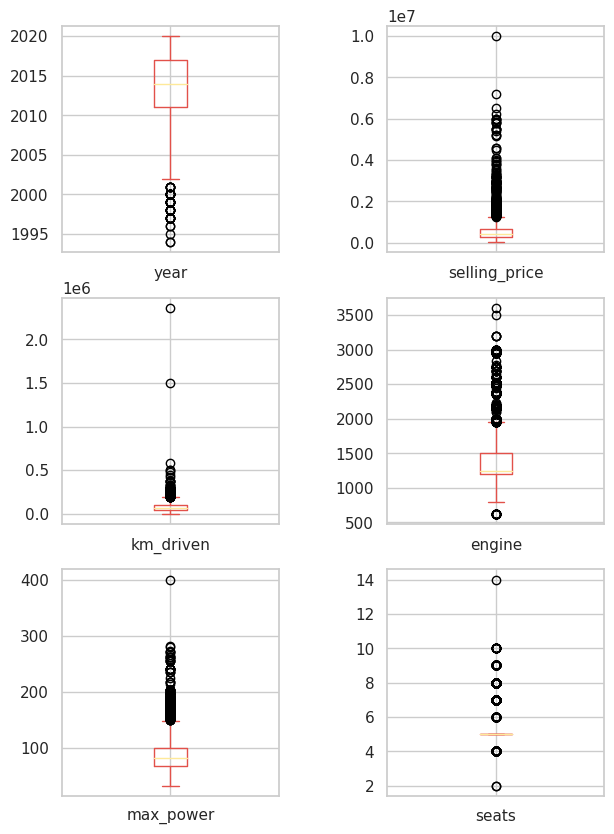

In [ ]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.plot(kind='box', subplots=True, layout=(3, 2), figsize=(7, 10))
plt.subplots_adjust(wspace=0.5);
plt.show()

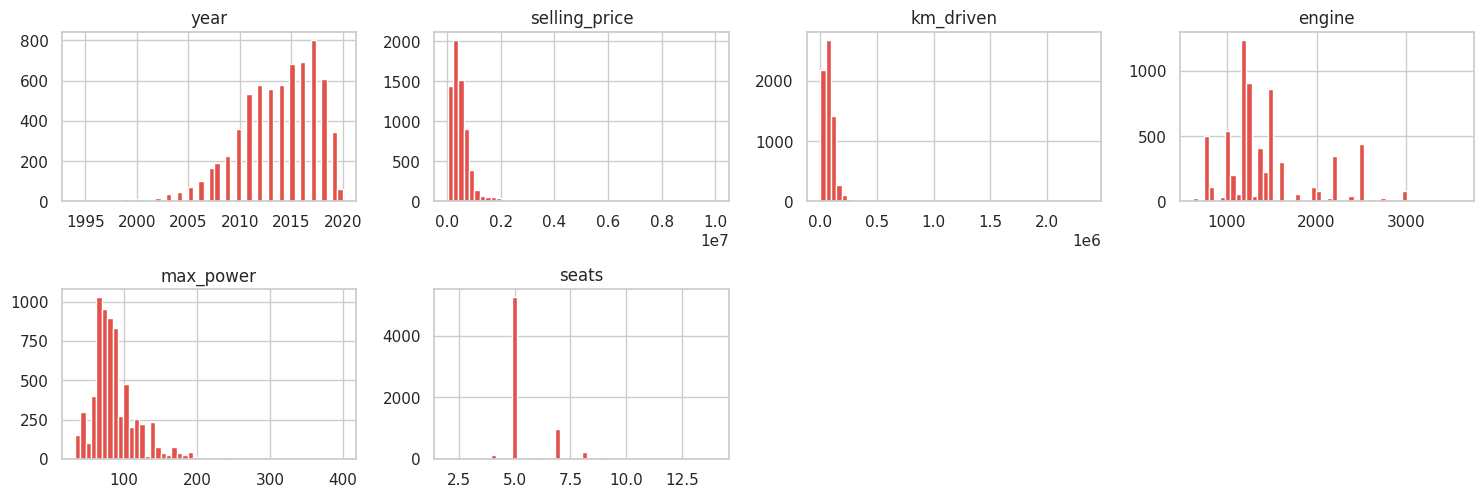

In [ ]:
numeric = df_to_plot.columns
plt.figure(figsize=(15,10))

df.hist(bins=50, ax= plt.gca(), layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

### Menghapus outliers

In [ ]:
df = df.loc[df['max_power'] <= 300.00]
df = df.loc[df['km_driven'] <= 500000]

# Data Insight

In [ ]:
from sklearn.linear_model import LinearRegression

### Korelasi

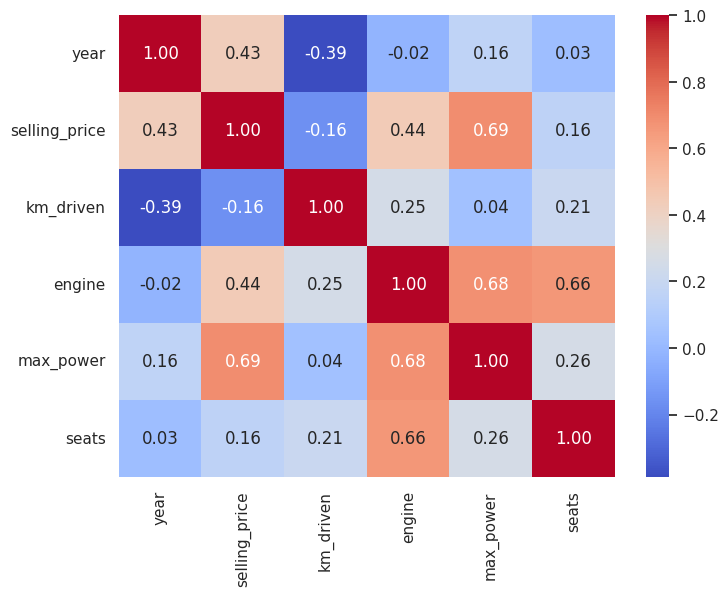

In [ ]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(df_to_plot.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Korelasi max_power terhadap selling_price

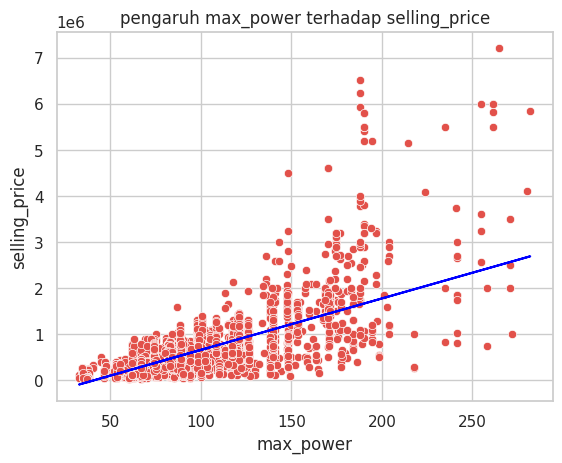

In [ ]:
x = df['max_power'].to_numpy().reshape(-1, 1)
y = df['selling_price']
linear = LinearRegression().fit(x,y)

plt.plot(x, linear.predict(x), color = 'blue')
sns.scatterplot(x=df['max_power'], y=df['selling_price'])
plt.title('pengaruh max_power terhadap selling_price')
plt.show()

### Korelasi engine terhadap selling_price

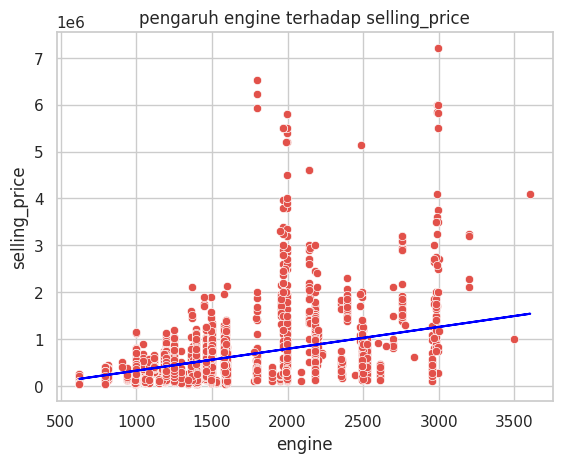

In [ ]:
x = df['engine'].to_numpy().reshape(-1, 1)
y = df['selling_price']
linear = LinearRegression().fit(x,y)

plt.plot(x, linear.predict(x), color = 'blue')
sns.scatterplot(x=df['engine'], y=df['selling_price'])
plt.title('pengaruh engine terhadap selling_price')
plt.show()

### Korelasi year terhadap selling_price

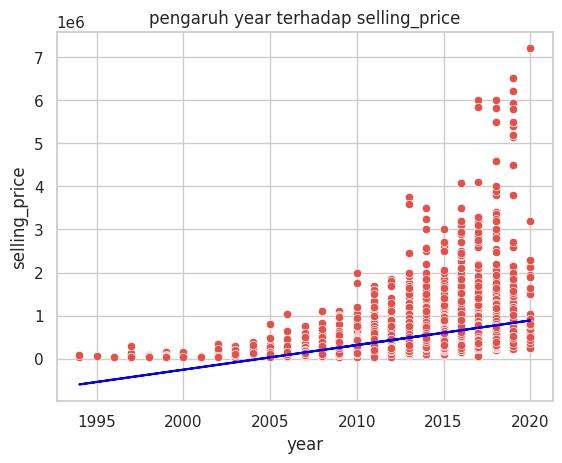

In [ ]:
x = df['year'].to_numpy().reshape(-1,1)
y = df['selling_price']
linear.fit(x,y)

plt.plot(x, linear.predict(x), color = 'blue')
sns.scatterplot(x=df['year'], y=df['selling_price'])
plt.title('pengaruh year terhadap selling_price')
plt.show()

### Car max_power berdasarkan fuel type

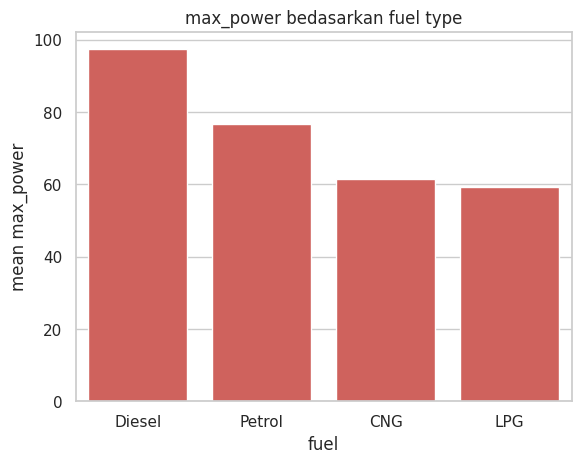

In [ ]:
fuel_max_power = df.groupby('fuel')['max_power'].mean().sort_values(ascending=False)

sns.barplot(x=fuel_max_power.index, y=fuel_max_power.values)
plt.title('max_power bedasarkan fuel type')
plt.ylabel('mean max_power')
plt.show()